# Bank Direct Marketing Campaign Analysis

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 
In this analysis our focus is to identify different attributes that influance targeted customers in making investments in this case, term deposit.

**"Term deposit is a fixed-term investment that includes deposits of money into accounts infinancial institutions.  Term deposit investments usually carry short-term maturities ranging from one month to a few years and will have varying levels of required minimum deposits.
The investor must understand when buying a term deposit that they can withdraw their funds only after the term ends. In some cases, the account holder may allow the investor early termination—or withdrawal—if they give several days notification. Also, there will be a penalty assessed for early termination."** [Investopedia](https://www.investopedia.com/terms/t/termdeposit.asp)

**Note:** Dataset can be found on UCSI Repository by following this [link](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

Though direct marketing campaign was conducted in Portugal, valuable information can be extracted from the data set. Hence, this analysis can also be extended to Saudi Censes by projecting imported features found in this analysis. The results obtained from this analysis will be inffered to saudi censes data for further discovery.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,fbeta_score
%matplotlib inline

### 1. Exploring attributes

In [2]:
# loading data as dataframe
df = pd.read_csv('bank-full.csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# spliting data set to target and attributs
target = df['y']
df = df.iloc[:,:-1]
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


### 1.1 Basic data exploration

In [4]:
# basic information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


#### Basic information of `df` dataframe:

- 17 columns
  - 7 numerical columns 
  - 10 categorical columns
- 45211 number of entries
- Dataframe used 5.9 Mb storage in local memory

In [5]:
# basic statistics
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### Numerical attributes in `df`:
- minimum,average and maximum 
  - age (18,40,95) most observation are under 48 
  - balance (-8019,1362,102127) most observations are under 1428 euros
  - campaign (1,2.76,63) contact times in campaign
  - duration (0,258,4918) seconds contact duration 
  - previous (0,0.58,275) contact times before the campaign

Age group in the data set are mostly made of young and mid-aged. Also since contact method was by call, we have call duration between the bank and indivisual which were recorded in seconds in the campain as well as previous contact attempts. Next step is to visualize the distribution of `age`,`balance`,`campaign` and `previous` attributes. Also converting `duration` and `previous` attributes from seconds to minutes for easy comparison.

In [6]:
# statistics of categorical
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome
count,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959


**Categorical attributes in `df`:**

- 12 unique jobs with `blue-collar` being the most 
- most observations are for married indivisuals
- most observations are secondary educated
- most observations do not have default records and have housing mortgage
- most methode of contact with indivisual was through cellular 
- great number of contact was in may
- most observers did not sign up for term deposit



### 1.2 Detailed attribute analysis

### 1.2.1 Numerical attributes 

In [7]:
# numerical data
is_numeric = df.select_dtypes(include=np.number)
is_numeric.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [8]:
# function for plotting distribution of numerical columns 
def plot_numeric(data,col):

    plt.figure(figsize=(16,4))

    plt.hist(data[col])
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title('{} distribution'.format(col.title()))
    plt.show()
    
        
    frequent_value = data[col].value_counts().sort_values(ascending=False).head(1).values[0]
    frequent_index = data[col].value_counts().sort_values(ascending=False).head(1).index[0]
    
    print(data[col].describe())
    print('\n most frequent value is: {}'.format(frequent_index),' occurred:',frequent_value)
    print('-----------------------------------------------------------------------------------------------------------------')

Age


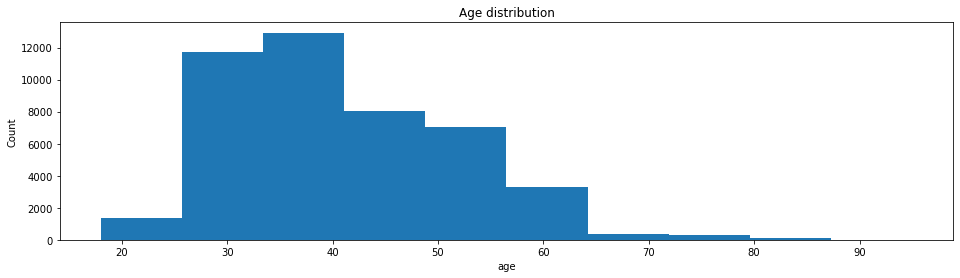

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

 most frequent value is: 32  occurred: 2085
-----------------------------------------------------------------------------------------------------------------
Balance


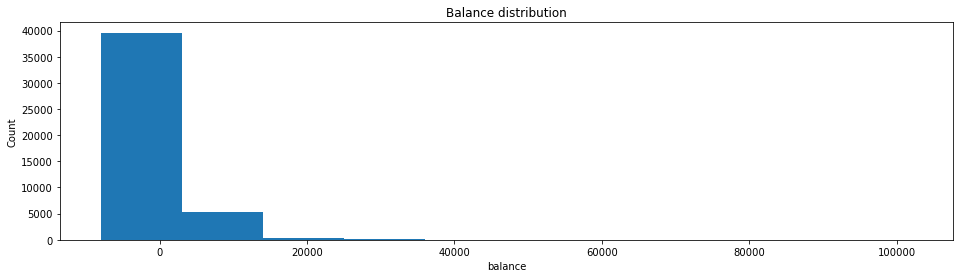

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

 most frequent value is: 0  occurred: 3514
-----------------------------------------------------------------------------------------------------------------
Day


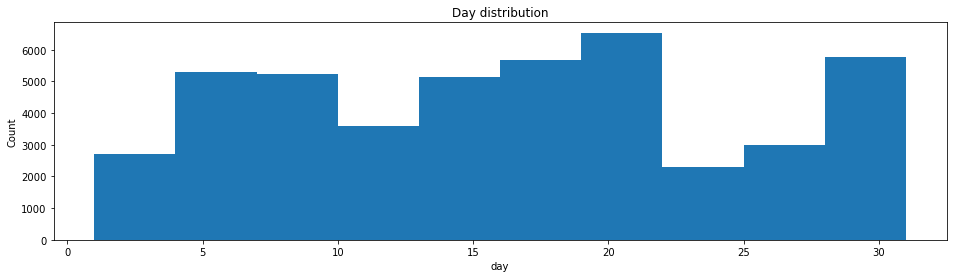

count    45211.000000
mean        15.806419
std          8.322476
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64

 most frequent value is: 20  occurred: 2752
-----------------------------------------------------------------------------------------------------------------
Duration


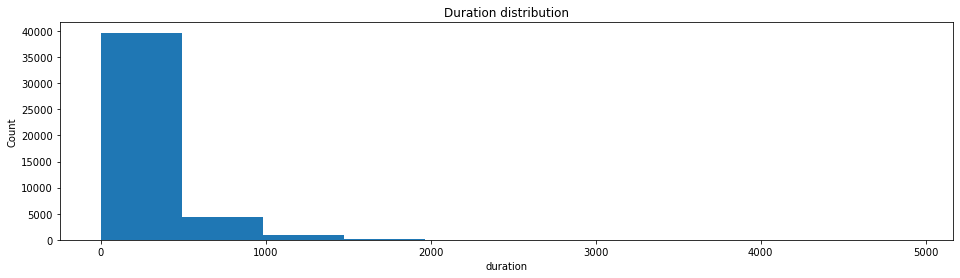

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

 most frequent value is: 124  occurred: 188
-----------------------------------------------------------------------------------------------------------------
Campaign


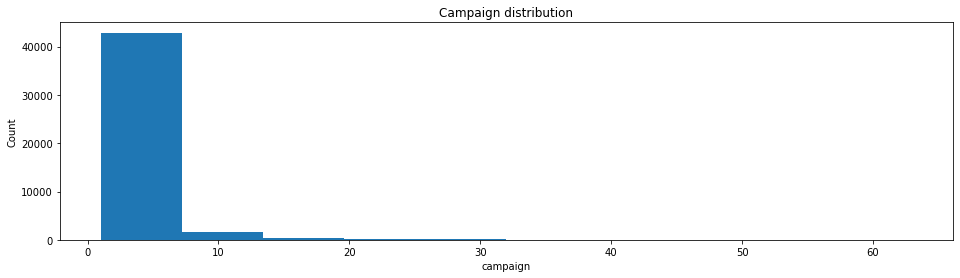

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

 most frequent value is: 1  occurred: 17544
-----------------------------------------------------------------------------------------------------------------
Pdays


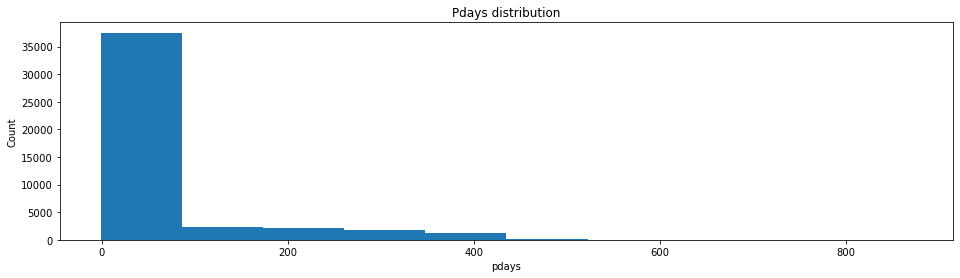

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

 most frequent value is: -1  occurred: 36954
-----------------------------------------------------------------------------------------------------------------
Previous


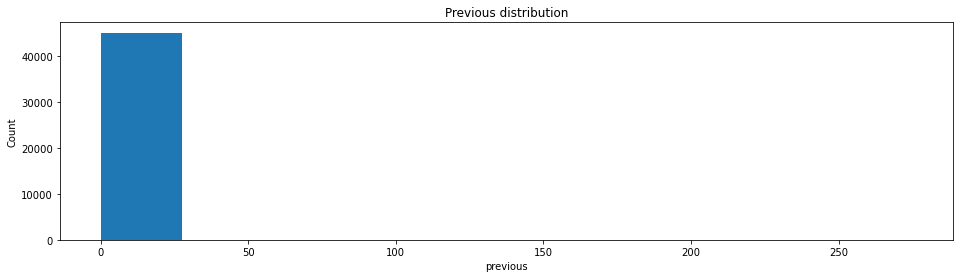

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

 most frequent value is: 0  occurred: 36954
-----------------------------------------------------------------------------------------------------------------


In [9]:
# plotting using 'is_numeric' function
for i in is_numeric.columns.tolist():
    print(i.title())
    plot_numeric(is_numeric,i)

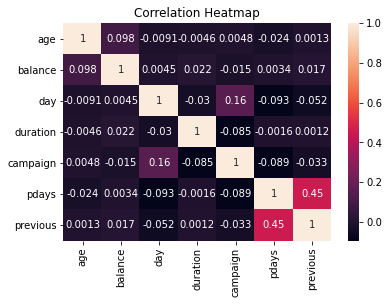

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000


In [10]:
# plotting correlation between attributes
sns.heatmap(is_numeric.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

print(is_numeric.corr())

In [11]:
# converting sec to minutes ex.1.3 for '1 minute and 30 seconds'
def to_minute(sec):
    fract_sec = (sec/60-sec//60)*0.6
    minute = fract_sec+sec//60
    return minute

In [12]:
# duration in minutes
df['duration_minute'] = df['duration'].apply(to_minute)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,duration_minute
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,4.21
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,2.31
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1.16
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1.32
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,3.18


**Findings from distribution plot:**

- signigicant number of observants are between (25 to 65) of age
  - The data consist of mostely on working age 
  - Bank targeted mostly financilay capabale indivisuals
- 75% of indivisuals had average yearly balance of 1428 euros
  - The bank might targeted mostly more income/less expending audiance
  - 25% of indivisuals had balance less than 72 euros
  - Balance attribute is highly right skweid duo to increase interest on higher balance accounts
- 75% of contact day held in first two thirds of each month
  - The bank might be interested on results achieved on last day of contact
  - Due to reporting required by the bank against internal success metrics
- More indivisuals had less than about 5 minute call
  - This attribute is focused on last contact attempt
  - Low contact duration might mean sale closing focused contact attempt
  - Indivisuals might have decision in mind prior the call
- Number of contact attemps were 6 contact attempts
  - Most frequent number of contact attempts was one time
  - Campaign attribute is higley skweid 
- 81% of indivisuals were not previously contacted
  - For predicting purposes, this attribute will be omitted
  - The aim of this project is to study contributing attributes to success or fail of marketing campaign hence eleminating any baises is essential. 
- 81% of indivisuals did not recieve any number of contact attempts

### 1.2.2 Categorical attributes 

In [13]:
# selecting categorical columns 
is_cate = df.select_dtypes(include='object')
is_cate.head()

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown


In [14]:
# plotting function for categorical attributes distribution
def cat_dist(col):
    col_dist = is_cate[col].value_counts(normalize=True) # frequency of each unique value as percent of total
    print(col_dist)

    plt.figure(figsize=(16,4))
    plt.bar(col_dist.index,col_dist.values)
    plt.xlabel(col)
    plt.ylabel('Percent of '+col)
    plt.title('Distribution of '+col.title())

    plt.show()

Job 

blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64


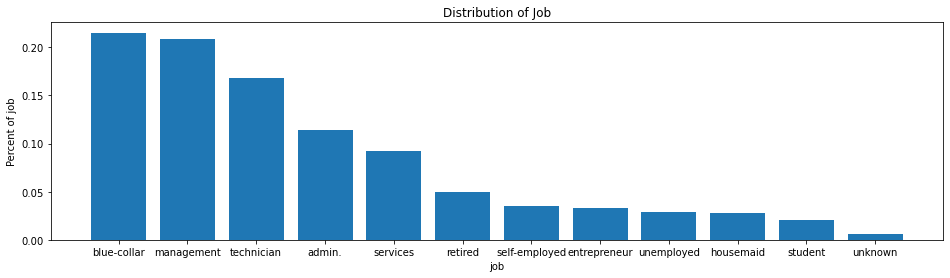

--------------------------------------------------------------------------------------------------------------
Marital 

married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64


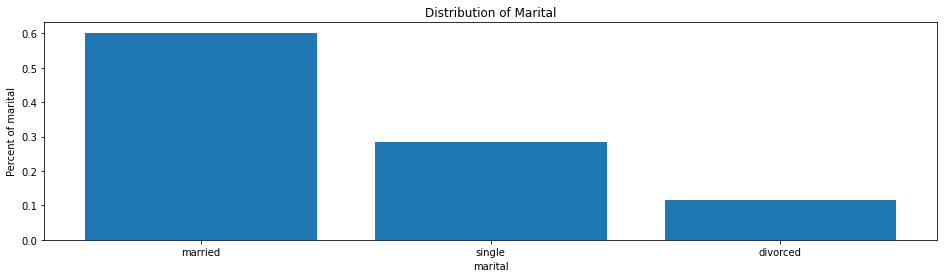

--------------------------------------------------------------------------------------------------------------
Education 

secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64


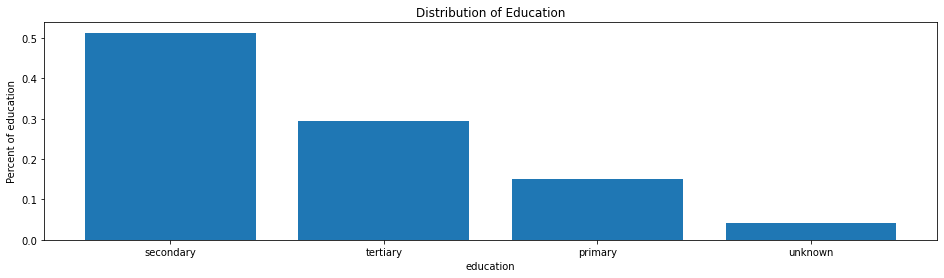

--------------------------------------------------------------------------------------------------------------
Default 

no     0.981973
yes    0.018027
Name: default, dtype: float64


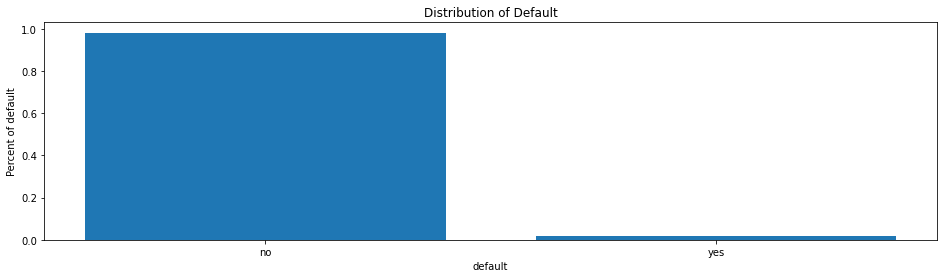

--------------------------------------------------------------------------------------------------------------
Housing 

yes    0.555838
no     0.444162
Name: housing, dtype: float64


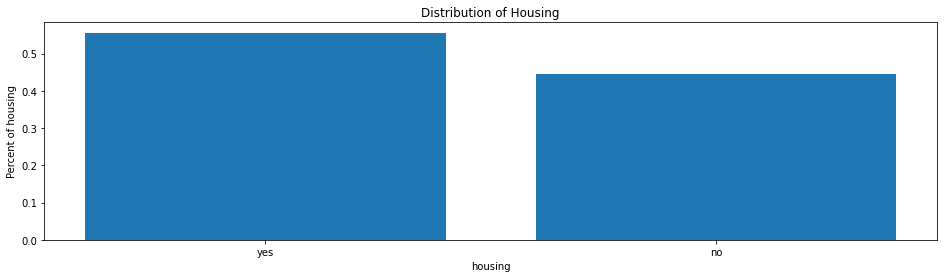

--------------------------------------------------------------------------------------------------------------
Loan 

no     0.839774
yes    0.160226
Name: loan, dtype: float64


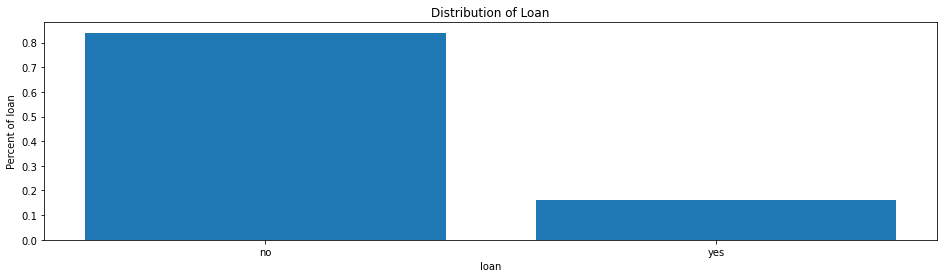

--------------------------------------------------------------------------------------------------------------
Contact 

cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: contact, dtype: float64


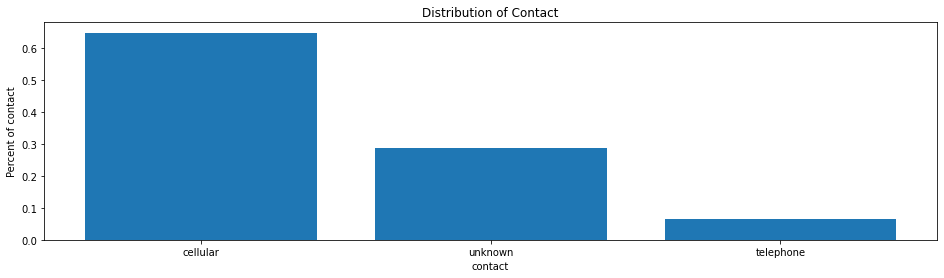

--------------------------------------------------------------------------------------------------------------
Month 

may    0.304483
jul    0.152507
aug    0.138174
jun    0.118135
nov    0.087810
apr    0.064851
feb    0.058592
jan    0.031032
oct    0.016323
sep    0.012807
mar    0.010551
dec    0.004733
Name: month, dtype: float64


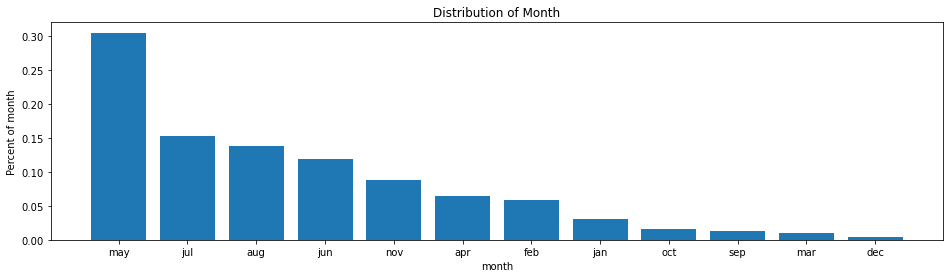

--------------------------------------------------------------------------------------------------------------
Poutcome 

unknown    0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: poutcome, dtype: float64


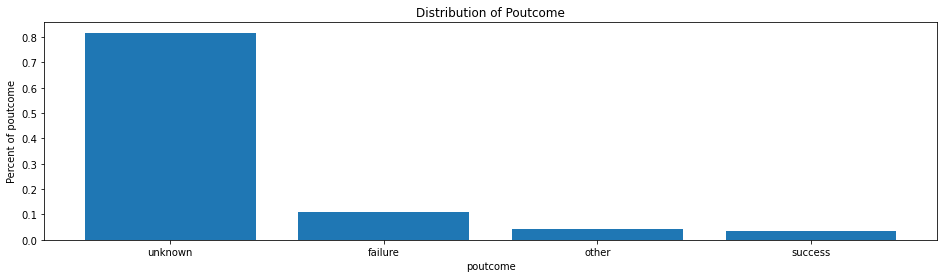

--------------------------------------------------------------------------------------------------------------


In [15]:
# ploting each categorical attribute
for category in is_cate.columns:
    print(category.title(),'\n')
    cat_dist(category)
    print('--------------------------------------------------------------------------------------------------------------')

In [16]:
# balance and job grouping
bal_job = df.pivot_table(values='balance',index='job',aggfunc=['mean','max','min'])
bal_job

,mean,max,min
,balance,balance,balance
job,,,
admin.,1135.838909,64343,-1601
blue-collar,1078.826654,66653,-8019
entrepreneur,1521.470074,59649,-2082
housemaid,1392.395161,45141,-1941
management,1763.616832,102127,-6847
retired,1984.215106,81204,-1598
self-employed,1647.970868,52587,-3313
services,997.088108,57435,-2122


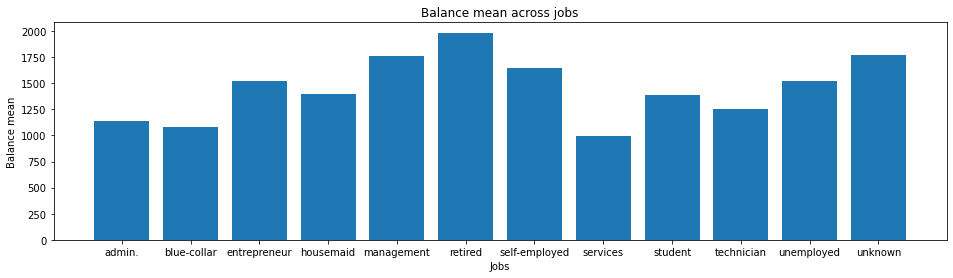

In [17]:
# mean balance distribution across jobs
plt.figure(figsize=(16,4))

plt.bar(bal_job.index,bal_job['mean']['balance'].values)
plt.xlabel('Jobs')
plt.ylabel('Balance mean')
plt.title('Balance mean across jobs')

plt.show()

In [18]:
# balance and education grouping
bal_edu = df.pivot_table(values='balance',index='education',aggfunc=['mean','max','min'])
bal_edu

,mean,max,min
,balance,balance,balance
education,,,
primary,1250.949934,71188,-2604
secondary,1154.880786,81204,-8019
tertiary,1758.416435,102127,-6847
unknown,1526.754443,64343,-1445


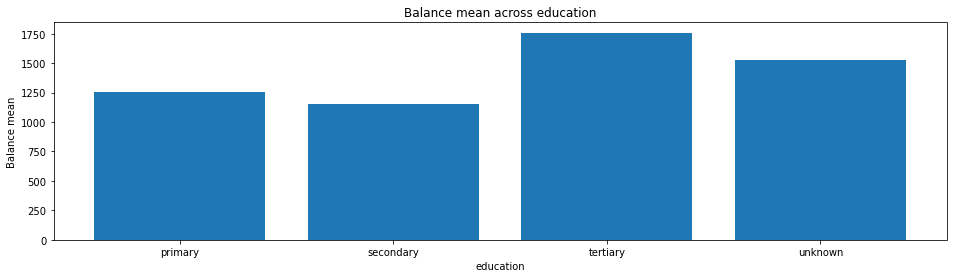

In [19]:
#mean balance distribution across education 
plt.figure(figsize=(16,4))

plt.bar(bal_edu.index,bal_edu['mean']['balance'].values)
plt.xlabel('education')
plt.ylabel('Balance mean')
plt.title('Balance mean across education')

plt.show()

In [20]:
# balance and education grouping 
bal_marit = df.pivot_table(values='balance',index='marital',aggfunc=['mean','max','min'])
bal_marit

,mean,max,min
,balance,balance,balance
marital,,,
divorced,1178.872287,66721,-4057
married,1425.925590,98417,-6847
single,1301.497654,102127,-8019


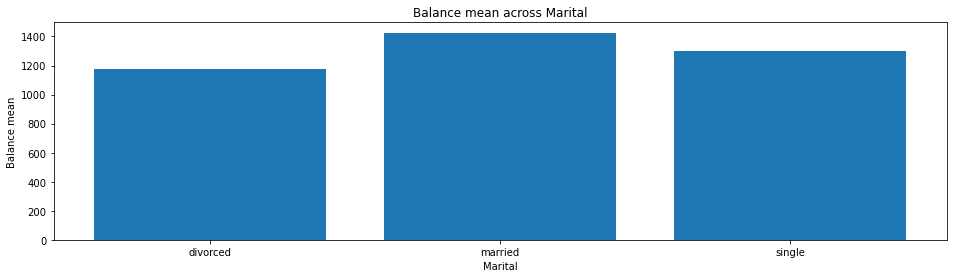

In [21]:
plt.figure(figsize=(16,4))

plt.bar(bal_marit.index,bal_marit['mean']['balance'].values)
plt.xlabel('Marital')
plt.ylabel('Balance mean')
plt.title('Balance mean across Marital')

plt.show()

In [22]:
# frequency of each marital status
marital_counts = df['marital'].value_counts()
total_married = marital_counts['married']
total_single = marital_counts['single']
total_divorced = marital_counts['divorced']
marital_counts

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [27]:
# age column binning
age_group1 = df[df['age'].between(18,30)]['marital']
age_group2 = df[df['age'].between(30,45)]['marital']
age_group3 = df[df['age'].between(45,65)]['marital']
age_group4 = df[df['age'].between(65,95)]['marital']

age_groups = list([age_group1,age_group2,age_group3,age_group4])

Married 


age_group1
• number of married is: 2061
• total married is: 27214
• making 7.57% percent of total married

age_group2
• number of married is: 14984
• total married is: 27214
• making 55.06% percent of total married

age_group3
• number of married is: 11162
• total married is: 27214
• making 41.02% percent of total married

age_group4
• number of married is: 625
• total married is: 27214
• making 2.30% percent of total married


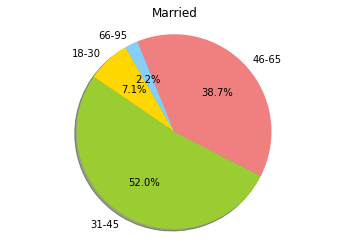

-------------------------------------------------------------------------------

Single 


age_group1
• number of single is: 4799
• total single is: 12790
• making 37.52% percent of total single

age_group2
• number of single is: 7943
• total single is: 12790
• making 62.10% percent of total single

age_group3
• number of single is: 1179
• total single is: 12790
• making 9.22% percent of total single

age_group4
• number of single is: 27
• total single is: 12790
• making 0.21% percent of total single


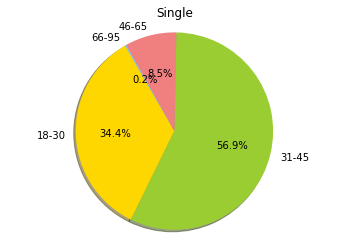

-------------------------------------------------------------------------------

Divorced 


age_group1
• number of divorced is: 170
• total divorced is: 5207
• making 3.26% percent of total divorced

age_group2
• number of divorced is: 2563
• total divorced is: 5207
• making 49.22% percent of total divorced

age_group3
• number of divorced is: 2572
• total divorced is: 5207
• making 49.40% percent of total divorced

age_group4
• number of divorced is: 158
• total divorced is: 5207
• making 3.03% percent of total divorced


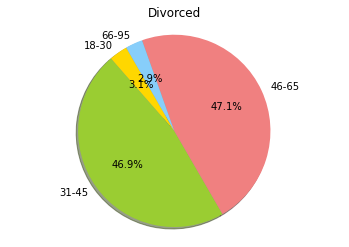

-------------------------------------------------------------------------------



In [28]:
# calculating age distribution on marital status

for status in df['marital'].unique():
    print(status.title(),'\n')
    age_counts = [] 
    
    for i,age in enumerate(age_groups):
        
        status_age_count = age[age==status].count() # age group counts in each status
        age_counts.append(status_age_count)
        
        total_status = marital_counts[status] # total number of counts in each status
        percent = (status_age_count/total_status)*100 # percent of each age group in each status
        
        print('\nage_group{}'.format(i+1))
    
        print('\u2022 number of {} is: {}'.format(status,status_age_count))
        print('\u2022 total {} is: {}'.format(status, total_status))
        
        print('\u2022 making {:.2f}% percent of total {}'.format(percent,status))
        
    labels = '18-30', '31-45', '46-65', '66-95'
    colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
    explode = (0.1, 0.1, 0.1, 0.1)  

    # pie chart for each status
    plt.pie(age_counts, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=120)
    plt.axis('equal')
    plt.title(status.title())
    plt.show()
    
    print('-------------------------------------------------------------------------------\n')